# Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge

from sklearn.utils import resample

import pickle

# Recolectar datos

In [2]:
df = pd.read_csv("vehicles.csv")

In [3]:
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,0,7313014409,https://cincinnati.craigslist.org/cto/d/hamilt...,cincinnati,https://cincinnati.craigslist.org,4350,2004.0,ford,f-150,good,...,full-size,truck,grey,https://images.craigslist.org/00T0T_icF3NMyUsf...,Rust Free Rockers !!...4.6..v8 ...Aggressive O...,NaN,oh,39.375200,-84.549300,2021-04-26T16:33:54-0400
1,1,7301652750,https://desmoines.craigslist.org/cto/d/des-moi...,des moines,https://desmoines.craigslist.org,4000,2008.0,ford,taurus x,excellent,...,NaN,SUV,NaN,https://images.craigslist.org/00i0i_2w0modFyZC...,2008 Ford Taurus X 3.5 motor 188k highway mile...,NaN,ia,41.625500,-93.673600,2021-04-04T09:57:38-0500
2,2,7307910032,https://bend.craigslist.org/ctd/d/portland-201...,bend,https://bend.craigslist.org,0,2011.0,chevrolet,silverado 1500 crew c,NaN,...,NaN,truck,NaN,https://images.craigslist.org/00D0D_4gcINez5Os...,2011 Chevrolet Silverado 1500 Crew Cab LT Pick...,NaN,or,45.425821,-122.633035,2021-04-16T13:11:16-0700
3,3,7316694316,https://detroit.craigslist.org/okl/ctd/d/flint...,detroit metro,https://detroit.craigslist.org,22995,2007.0,ram,3500,good,...,full-size,truck,blue,https://images.craigslist.org/00t0t_bz7qoSQwqF...,2007 Dodge Ram 3500 Laramie Mega Cab 4WD DRW -...,NaN,mi,43.050600,-83.615120,2021-05-04T10:16:37-0400
4,4,7306305187,https://oklahomacity.craigslist.org/ctd/d/norm...,oklahoma city,https://oklahomacity.craigslist.org,13588,2015.0,gmc,terrain,like new,...,NaN,NaN,NaN,https://images.craigslist.org/00C0C_88sTwhpZvs...,THIS 2015 GMC TERRAIN WAS JUST TRADED IN LAST ...,NaN,ok,35.199000,-97.484100,2021-04-13T14:05:59-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,7312161807,https://humboldt.craigslist.org/cto/d/eureka-1...,humboldt county,https://humboldt.craigslist.org,5500,1973.0,dodge,b300,fair,...,full-size,van,white,https://images.craigslist.org/00U0U_kdBKVayu5g...,Interior size of a sprinter with a fraction of...,NaN,ca,40.793800,-124.157300,2021-04-24T17:26:59-0700
24996,24996,7316687582,https://modesto.craigslist.org/ctd/d/stockton-...,modesto,https://modesto.craigslist.org,0,2005.0,gmc,sierra 1500 hybrid sle,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00000_eOfLbz8hdv...,209 Trucks NO HAGGLE / NO HASSLE PRICING!STOCK...,NaN,ca,38.017870,-121.268904,2021-05-04T07:04:15-0700
24997,24997,7314948487,https://honolulu.craigslist.org/oah/ctd/d/car-...,hawaii,https://honolulu.craigslist.org,500,2012.0,NaN,accord civic,new,...,NaN,NaN,NaN,https://images.craigslist.org/01010_8HbWUnavb4...,"HAWAII YELLOW MOPED AND CAR RENTAL , LLC Aff...",NaN,hi,21.348800,-157.875900,2021-04-30T08:54:32-1000
24998,24998,7314733895,https://washingtondc.craigslist.org/doc/ctd/d/...,"washington, DC",https://washingtondc.craigslist.org,4900,2007.0,jeep,grand cherokee,NaN,...,NaN,SUV,blue,https://images.craigslist.org/00A0A_3e1qbqoYSa...,2007 *Jeep* *Grand Cherokee* 4WD 4dr Limited S...,NaN,dc,38.663556,-77.251230,2021-04-30T08:20:41-0400


# Preprocesar datos

##Limpieza de los datos + Ingeniería de características

In [4]:
df = df[['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
         'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
         'paint_color', 'price']]

In [5]:
df.isna().sum()

year               84
manufacturer     1015
model             301
condition       10287
cylinders       10479
fuel              186
odometer          243
title_status      459
transmission      135
drive            7649
size            17896
type             5409
paint_color      7636
price               0
dtype: int64

In [6]:
fillable_nan_cols = df.columns[df.isna().sum() > 20000]
dropable_nan_cols = [col for col in df.columns if col not in fillable_nan_cols]

In [7]:
for col in dropable_nan_cols:
  df = df[df[col].notna()]

In [8]:
df = df.fillna('Unkown')

<Axes: >

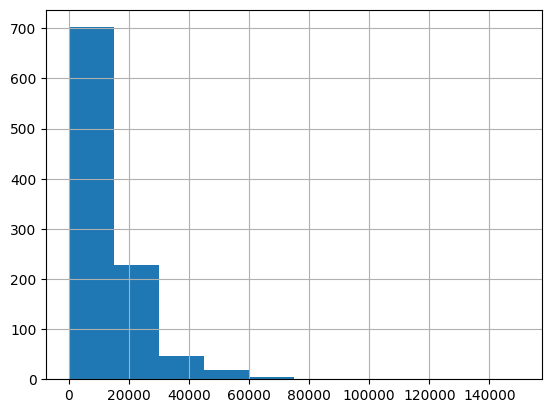

In [11]:
df["price"].sample(1000).hist()

<Axes: xlabel='manufacturer', ylabel='price'>

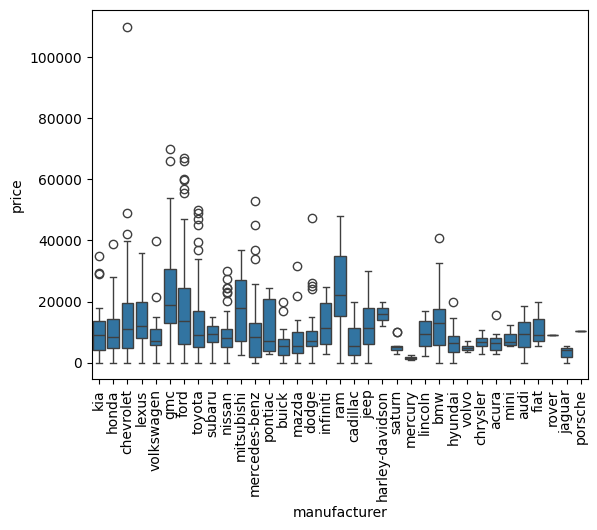

In [12]:
plt.xticks(rotation=90)
sns.boxplot(x="manufacturer", y="price", data=df.sample(1000))

<Axes: xlabel='year', ylabel='price'>

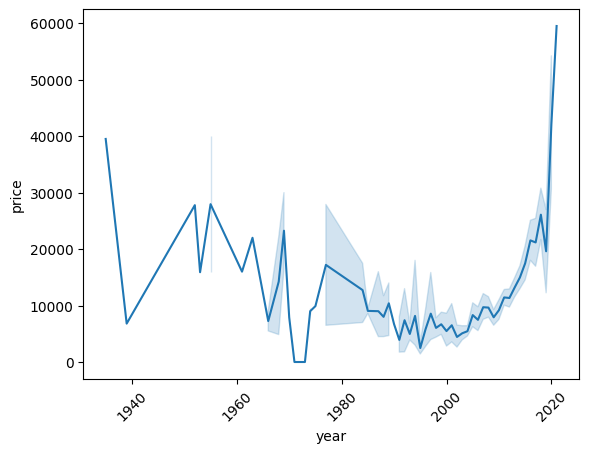

In [15]:
plt.xticks(rotation=45)
sns.lineplot(x="year", y="price", data=df.sample(1000))

<Axes: xlabel='odometer', ylabel='price'>

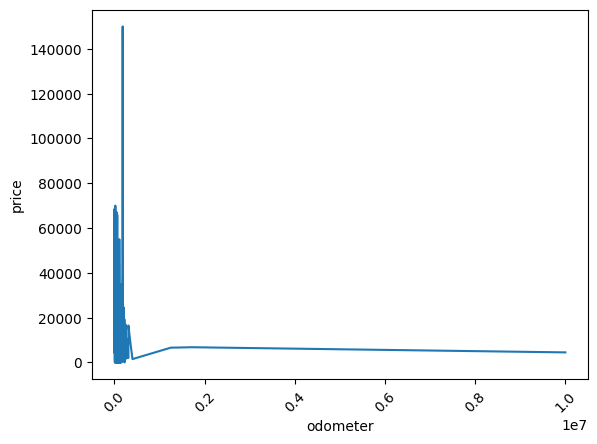

In [16]:
plt.xticks(rotation=45)
sns.lineplot(x="odometer", y="price", data=df.sample(1000))

<Axes: xlabel='fuel', ylabel='price'>

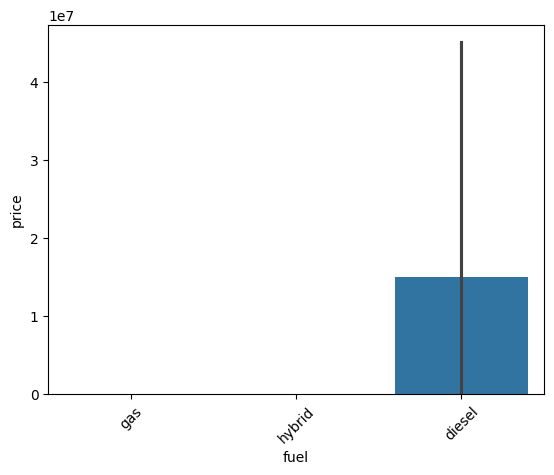

In [18]:
plt.xticks(rotation=45)
sns.barplot(x="fuel", y="price", data=df.sample(1000))

<Axes: xlabel='title_status', ylabel='price'>

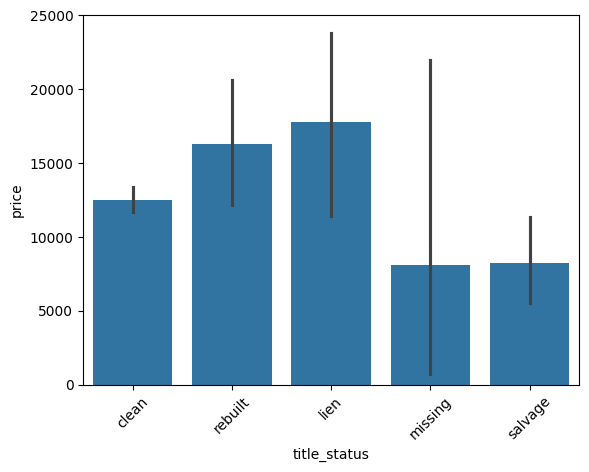

In [21]:
plt.xticks(rotation=45)
sns.barplot(x="title_status", y="price", data=df.sample(1000))

## Codificación

In [22]:
df = df.sample(2000)

In [23]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [24]:
numerical_columns = x.columns[(x.dtypes == "float64") | (x.dtypes == "int64")]
categorical_columns = x.columns[(x.dtypes == "object")]

In [25]:
col_transf = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough"
)

#Entrenamiento + Evaluación

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [27]:
models = []
models.append(("KNN", KNeighborsRegressor()))
models.append(("LR", LinearRegression()))
#models.append(("RR", Ridge())),
#models.append(("LASSOR", Lasso()))
#models.append(("BR", BayesianRidge()))
models.append(("RF", RandomForestRegressor()))
models.append(("SVR", SVR()))

In [28]:
pipelines = {name: make_pipeline(col_transf, model) for name, model in models}

In [29]:
results = []
scoring = 'r2'
kfolds = 5

for name, pipeline in pipelines.items():
	cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfolds, scoring=scoring)
	results.append({name: cv_results})

In [30]:
results

[{'KNN': array([0.31135716, 0.19416259, 0.35682979, 0.51116893, 0.51192883])},
 {'LR': array([ 0.10800754, -0.18507852, -0.01497264,  0.23002449, -3.79458187])},
 {'RF': array([0.57430813, 0.25376342, 0.55692203, 0.56886261, 0.59957625])},
 {'SVR': array([-0.13508424, -0.05178133, -0.07840059, -0.11721954, -0.10899303])}]

In [31]:
best_model = sorted(results, key=lambda x: list(x.values())[0].mean(), reverse=True)[0]
best_pipeline = pipelines[list(best_model.keys())[0]]

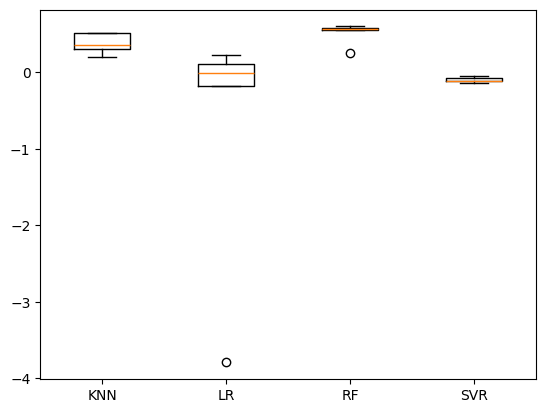

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([list(dict_.values())[0] for dict_ in results])
ax.set_xticklabels([list(dict_.keys())[0] for dict_ in results])
plt.show()

#Predicciones

In [33]:
best_pipeline.fit(X_train, y_train)
best_pipeline.predict(X_test)

array([ 4801.9       ,  7146.9       ,  3845.83      ,  8095.24      ,
       18149.        ,  6769.61      , 21339.14      ,  3651.21      ,
       17796.36      , 27664.35      ,  7219.14      ,  8380.82      ,
        9113.08      ,  5136.64      , 17487.83      ,  6606.82      ,
       11454.19      ,  3242.05      , 10964.33      , 24229.64      ,
       13308.6       , 32342.97      ,  7741.32      ,  4420.38      ,
       13158.22      ,  3689.67      , 16774.17      ,  7232.1       ,
        6550.19      ,  8352.8       , 13628.01      , 20630.97      ,
        6216.71      , 16845.38      ,  5385.53      , 16953.3       ,
       13473.26      ,  7538.36      , 15881.28      ,  8378.62      ,
       18725.67      ,  6776.46      ,  5128.07      , 10152.3       ,
        6049.53      , 22738.71      , 12428.26      ,  4585.53      ,
        8215.83      ,  6655.64      , 25008.16      , 14121.95      ,
       15757.44      ,  3693.16      , 10592.01      , 24009.14      ,
      

#Exportación del modelo

In [34]:
filename = 'vehicle_price_estimator.pkl'
pickle.dump(best_pipeline, open(filename, 'wb'))